In [6]:
import requests as req
import pandas as pd
from config_local import census_api
from census import Census

In [7]:
# read places 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
places_df=xls.parse('AmazonCities', dtype=str) 

In [8]:
places = places_df[['PlaceCode','StateCode']]
places


,PlaceCode,StateCode
0,50000,11
1,51000,36
2,07000,25
3,14000,17
4,44000,06
5,55000,37
6,05000,48
7,04000,13


In [9]:
codes_df = xls.parse('CensusFields',parse_cols=1)

In [10]:
c = Census(census_api, year=2016)

home_rent =[]

In [11]:
for p in places.values:
    place_state = {'for':'place:'+ str(p[0]),'in':'state:'+str(p[1])}
    census_data = c.acs5.get(("NAME", "B25077_001E", "B25064_001E", "B01003_001E",
                              "B19013_001E", "B25105_001E","B25004_004E","B25004_002E"
                              ), 
                             place_state)
    print(census_data)
    home_rent.append({'City':census_data[0]['NAME'],
                     'Median home value':census_data[0]['B25077_001E'],
                     'Median gross rent':census_data[0]['B25064_001E'],
                     'Population':census_data[0]['B01003_001E'],
                     'Income':census_data[0]['B19013_001E'],
                     'Median Mortgage Cost':census_data[0]['B25105_001E'],
                     'Homeowner Vacancy Rate':census_data[0]['B25004_004E'],
                     'Rental Vacancy Rate':census_data[0]['B25004_002E']
                     })
    #time.sleep(10)
print(home_rent)    
    

[{'NAME': 'Washington city, District of Columbia', 'B25077_001E': 506100.0, 'B25064_001E': 1362.0, 'B01003_001E': 659009.0, 'B19013_001E': 72935.0, 'B25105_001E': 1539.0, 'B25004_004E': 2000.0, 'B25004_002E': 10256.0, 'state': '11', 'place': '50000'}]
[{'NAME': 'New York city, New York', 'B25077_001E': 508900.0, 'B25064_001E': 1294.0, 'B01003_001E': 8461961.0, 'B19013_001E': 55191.0, 'B25105_001E': 1362.0, 'B25004_004E': 19855.0, 'B25004_002E': 76655.0, 'state': '36', 'place': '51000'}]
[{'NAME': 'Boston city, Massachusetts', 'B25077_001E': 423200.0, 'B25064_001E': 1369.0, 'B01003_001E': 658279.0, 'B19013_001E': 58516.0, 'B25105_001E': 1518.0, 'B25004_004E': 1136.0, 'B25004_002E': 5576.0, 'state': '25', 'place': '07000'}]
[{'NAME': 'Chicago city, Illinois', 'B25077_001E': 225200.0, 'B25064_001E': 987.0, 'B01003_001E': 2714017.0, 'B19013_001E': 50434.0, 'B25105_001E': 1138.0, 'B25004_004E': 13417.0, 'B25004_002E': 40067.0, 'state': '17', 'place': '14000'}]
[{'NAME': 'Los Angeles city, C

In [12]:
#get dataframe
housing_df = pd.DataFrame(home_rent)
housing_df

,City,Homeowner Vacancy Rate,Income,Median Mortgage Cost,Median gross rent,Median home value,Population,Rental Vacancy Rate
0,"Washington city, District of Columbia",2000.0,72935.0,1539.0,1362.0,506100.0,659009.0,10256.0
1,"New York city, New York",19855.0,55191.0,1362.0,1294.0,508900.0,8461961.0,76655.0
2,"Boston city, Massachusetts",1136.0,58516.0,1518.0,1369.0,423200.0,658279.0,5576.0
3,"Chicago city, Illinois",13417.0,50434.0,1138.0,987.0,225200.0,2714017.0,40067.0
4,"Los Angeles city, California",5401.0,51538.0,1410.0,1241.0,496300.0,3918872.0,30057.0
5,"Raleigh city, North Carolina",1606.0,58641.0,1081.0,966.0,218200.0,441326.0,5241.0
6,"Austin city, Texas",1872.0,60939.0,1215.0,1106.0,257800.0,907779.0,11621.0
7,"Atlanta city, Georgia",2735.0,49398.0,1112.0,998.0,222300.0,456378.0,9829.0


In [13]:
# Estimate affordable housing cost/income
housing_df['home owner afford'] = (12*housing_df['Median Mortgage Cost'])/housing_df['Income']
housing_df['rent afford'] = (12*housing_df['Median gross rent'])/housing_df['Income']

In [14]:
housing_df
housing_df.to_csv("housing.csv")

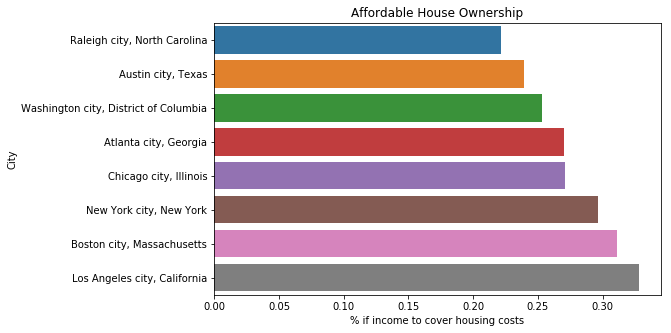

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('home owner afford')
sns.barplot(y='City',x='home owner afford',data=housing_df)
plt.xlabel("% if income to cover housing costs")

plt.title("Affordable House Ownership")
plt.show()


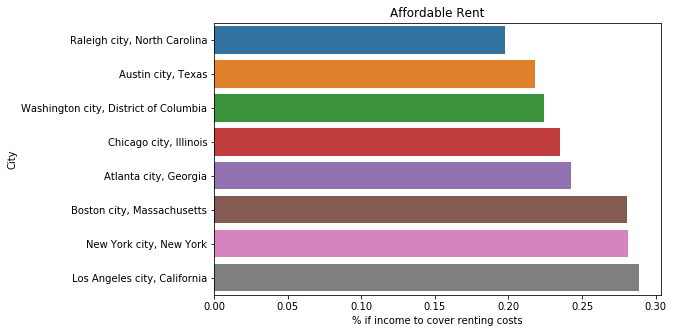

In [17]:
plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('rent afford')
sns.barplot(y='City',x='rent afford',data=housing_df)
plt.xlabel("% if income to cover renting costs")
plt.title("Affordable Rent")
plt.show()

In [18]:
#combined chart

In [19]:
housing_df_temp_own = housing_df.copy()
housing_df_temp_rent = housing_df.copy()
housing_df_temp_own['RentOwn'] = 'own'
housing_df_temp_own['Afford'] = housing_df_temp_own['home owner afford']
housing_df_temp_rent['RentOwn'] = 'rent'
housing_df_temp_rent['Afford'] = housing_df_temp_own['rent afford']
frames= [housing_df_temp_own, housing_df_temp_rent]
housing_df_rentOwn = pd.concat(frames, ignore_index= 'True')

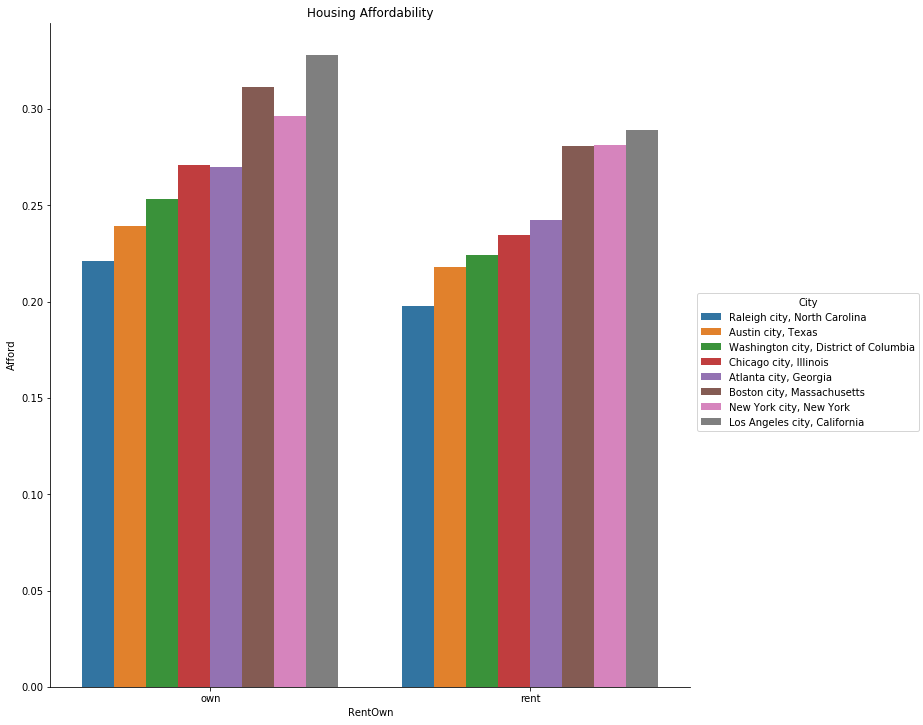

In [20]:
sns.factorplot(kind='bar',x='RentOwn',y='Afford', hue='City',data=housing_df_rentOwn, size=10)
plt.title("Housing Affordability")
plt.show()

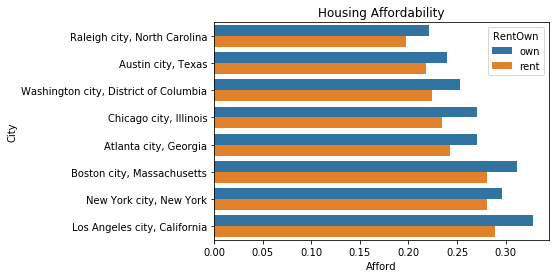

In [21]:
#By City
sns.barplot(x="Afford", y="City", hue="RentOwn", data=housing_df_rentOwn)
plt.title("Housing Affordability")

plt.show()

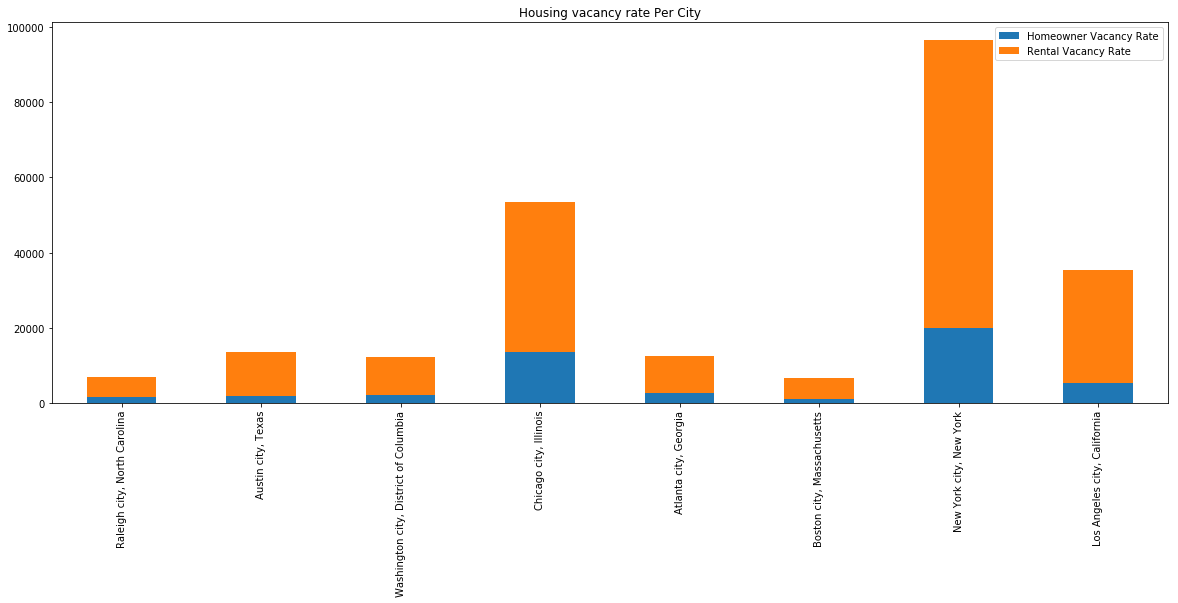

In [22]:
# Vacancy
vacancy_df = housing_df[['Homeowner Vacancy Rate','Rental Vacancy Rate']]
pa = vacancy_df.plot.bar(stacked=True,figsize=(20,7))
# Set a title for the chart
plt.title("Housing vacancy rate Per City")
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
pa.set_xticklabels(housing_df["City"])

plt.show()
